# TWITTER SENTIMENT ANALYSIS - NLP
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [2]:
df = pd.read_csv('/home/sherin/Downloads/Twitter Data.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


# preprocessing the dataset

In [4]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
# remove (#)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "#[/w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https://goo.gl/h1Mf...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [8]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https goo gl h Mf...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https MfQV android ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this Would talk makememories unplug relax...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know George made that iphone cute davent...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [10]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [fingerprint, Pregnancy, Test, https, MfQV, an...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, talk, makememories, unplug...
3    [wired, know, George, made, that, iphone, cute...
4    [What, amazing, service, Apple, even, talk, ab...
Name: clean_tweet, dtype: object

In [11]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [fingerprint, pregnanc, test, http, mfqv, andr...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, talk, makememori, unplug, r...
3    [wire, know, georg, made, that, iphon, cute, d...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: clean_tweet, dtype: object

In [12]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test http mfqv android ap...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl soni xp...
2,3,0,We love this! Would you go? #talk #makememorie...,love thi would talk makememori unplug relax ip...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that iphon cute daventri ...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


# Exploratory Data Analysis

In [13]:
!pip install wordcloud

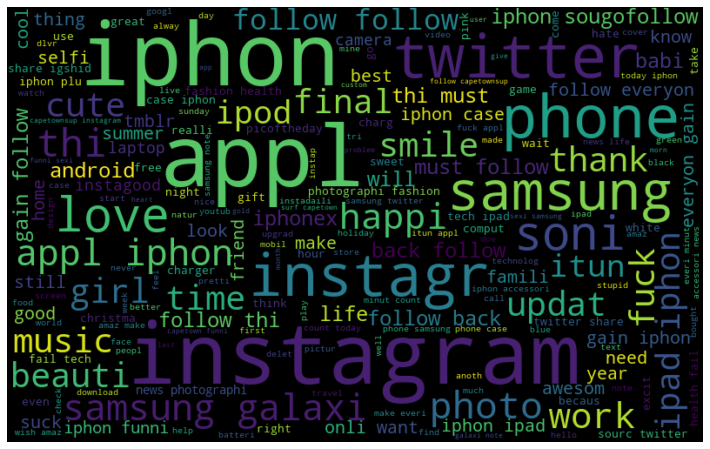

In [14]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

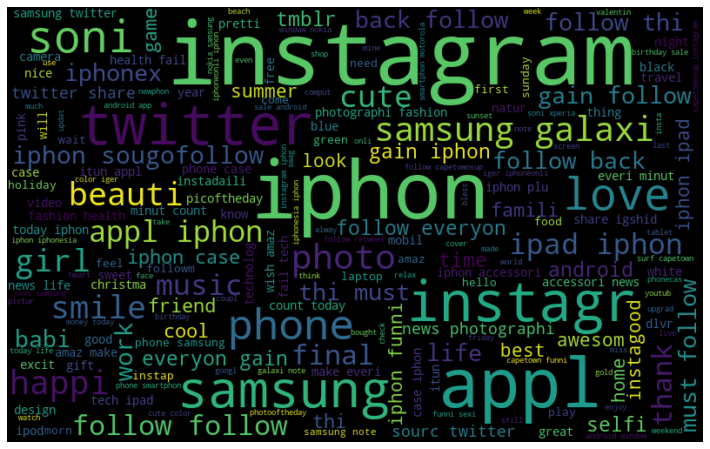

In [15]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

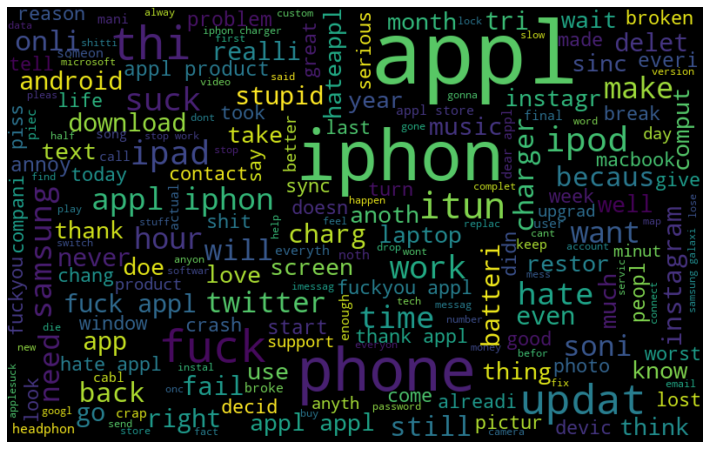

In [16]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# input split

In [17]:
#Vectorizing the tweets using TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = 'english')
data_vec = vec.fit_transform(df['clean_tweet'])

In [18]:
data_vec

<7920x17826 sparse matrix of type '<class 'numpy.float64'>'
	with 87068 stored elements in Compressed Sparse Row format>

In [19]:
df.shape

(7920, 4)

In [20]:
#Seperating label y from the train_data
y = df.label
type(y)

pandas.core.series.Series

In [21]:
y = y.values
type(y)

numpy.ndarray

In [22]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

0    5894
1    2026
dtype: int64

# spliting train data and test data

In [23]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,random_state=42)

In [24]:
!pip install imbalanced-learn

In [27]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [28]:
!pip install delayed

# logistic regression

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [31]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [32]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8901515151515151

# XGB classifier

In [34]:
#XGBClassifier
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

/home/sherin/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8825757575757576

# random forest

In [37]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_pred2 = model2.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.889520202020202

Therefore in this three alogorithm we choose logistic regression beacause it shows high accuracy score

In [ ]:
#END